# **Diamonds Project**

---

In [1]:
import numpy as np
import pandas as pd
import os
import tarfile
import urllib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [ ]:
from google.colab import drive 
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


## **Get Data**

In [2]:
train_data = pd.read_csv('train2.csv')
test_data = pd.read_csv('test.csv')
diamonds = train_data.copy()

## **Analysing Data**

In [3]:
diamonds.head()

,Id,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,1.06,Ideal,I,SI2,61.8,57.0,4270,6.57,6.60,4.07
1,2,1.51,Premium,G,VVS2,60.9,58.0,15164,7.38,7.42,4.51
2,3,0.32,Ideal,F,VS2,61.3,56.0,828,4.43,4.41,2.71
3,4,0.53,Ideal,G,VS2,61.2,56.0,1577,5.19,5.22,3.19
4,5,0.70,Premium,H,VVS2,61.0,57.0,2596,5.76,5.72,3.50


In [4]:
diamonds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43152 entries, 0 to 43151
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Id       43152 non-null  int64  
 1   carat    43152 non-null  float64
 2   cut      43152 non-null  object 
 3   color    43152 non-null  object 
 4   clarity  43152 non-null  object 
 5   depth    43152 non-null  float64
 6   table    43152 non-null  float64
 7   price    43152 non-null  int64  
 8   x        43152 non-null  float64
 9   y        43152 non-null  float64
 10  z        43152 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 3.6+ MB


In [5]:
diamonds.describe()

,Id,carat,depth,table,price,x,y,z
count,43152.000000,43152.000000,43152.000000,43152.000000,43152.000000,43152.000000,43152.000000,43152.000000
mean,21576.500000,0.797855,61.747177,57.458347,3929.491912,5.731568,5.735018,3.538568
std,12457.053745,0.473594,1.435454,2.233904,3985.527795,1.121279,1.148809,0.708238
min,1.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,10788.750000,0.400000,61.000000,56.000000,947.750000,4.710000,4.720000,2.910000
50%,21576.500000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,32364.250000,1.040000,62.500000,59.000000,5312.000000,6.540000,6.540000,4.040000
max,43152.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


## **Visualization Data**

array([[<AxesSubplot: title={'center': 'Id'}>,
        <AxesSubplot: title={'center': 'carat'}>,
        <AxesSubplot: title={'center': 'depth'}>],
       [<AxesSubplot: title={'center': 'table'}>,
        <AxesSubplot: title={'center': 'price'}>,
        <AxesSubplot: title={'center': 'x'}>],
       [<AxesSubplot: title={'center': 'y'}>,
        <AxesSubplot: title={'center': 'z'}>, <AxesSubplot: >]],
      dtype=object)

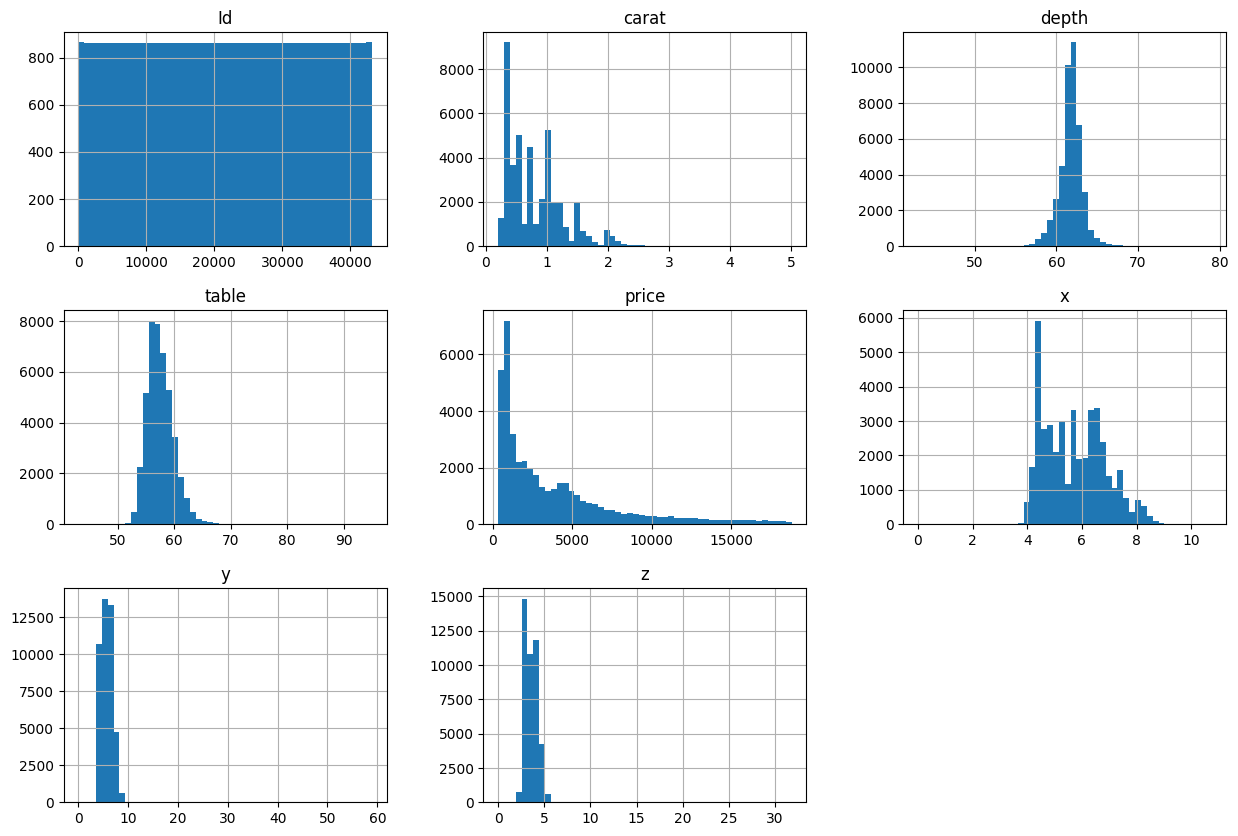

In [6]:
diamonds.hist(bins=50, figsize=(15,10))

C:\Users\Mahmoud\AppData\Local\Temp\ipykernel_2780\4091009972.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=diamonds.corr()


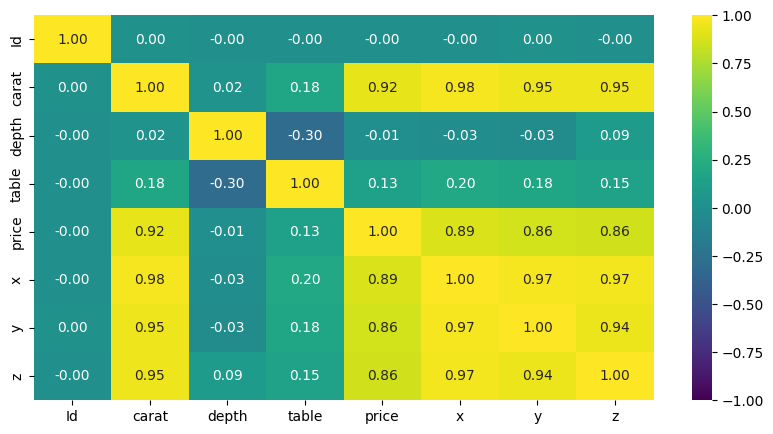

In [7]:
corr=diamonds.corr()
plt.figure(figsize=(10, 5))
heatmap = sns.heatmap(corr, vmin=-1, vmax=1, annot=True, cmap='viridis',fmt='.2f')

array([[<AxesSubplot: xlabel='carat', ylabel='carat'>,
        <AxesSubplot: xlabel='x', ylabel='carat'>,
        <AxesSubplot: xlabel='y', ylabel='carat'>,
        <AxesSubplot: xlabel='z', ylabel='carat'>,
        <AxesSubplot: xlabel='price', ylabel='carat'>],
       [<AxesSubplot: xlabel='carat', ylabel='x'>,
        <AxesSubplot: xlabel='x', ylabel='x'>,
        <AxesSubplot: xlabel='y', ylabel='x'>,
        <AxesSubplot: xlabel='z', ylabel='x'>,
        <AxesSubplot: xlabel='price', ylabel='x'>],
       [<AxesSubplot: xlabel='carat', ylabel='y'>,
        <AxesSubplot: xlabel='x', ylabel='y'>,
        <AxesSubplot: xlabel='y', ylabel='y'>,
        <AxesSubplot: xlabel='z', ylabel='y'>,
        <AxesSubplot: xlabel='price', ylabel='y'>],
       [<AxesSubplot: xlabel='carat', ylabel='z'>,
        <AxesSubplot: xlabel='x', ylabel='z'>,
        <AxesSubplot: xlabel='y', ylabel='z'>,
        <AxesSubplot: xlabel='z', ylabel='z'>,
        <AxesSubplot: xlabel='price', ylabel='z'>],
    

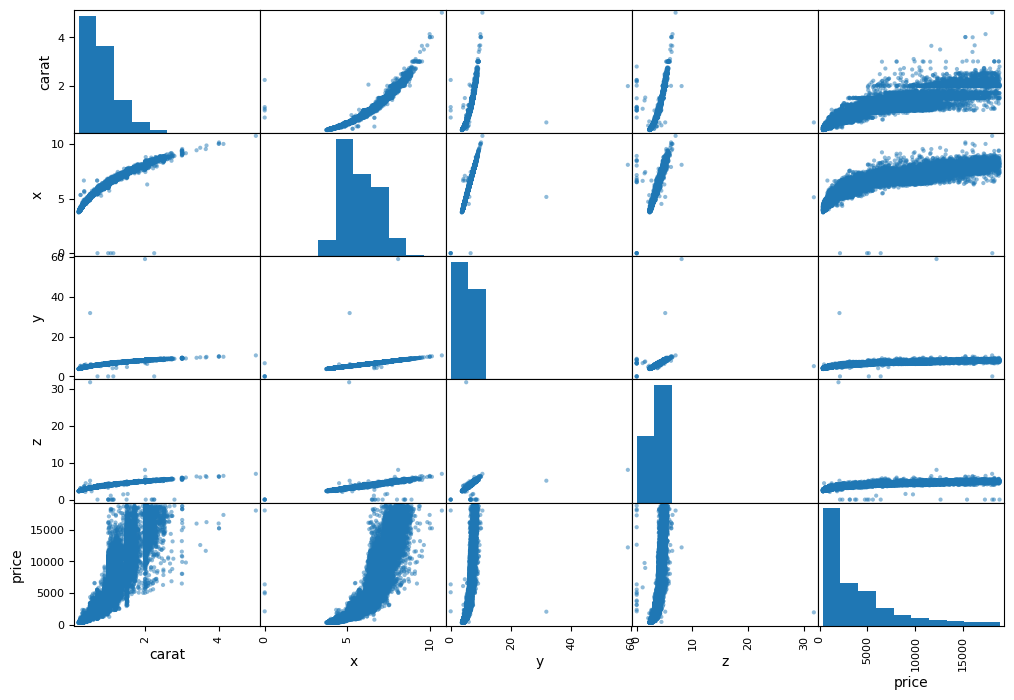

In [8]:
from pandas.plotting import scatter_matrix
attributes = ["carat", "x", "y", "z","price"]
scatter_matrix(diamonds[attributes], figsize=(12,8))

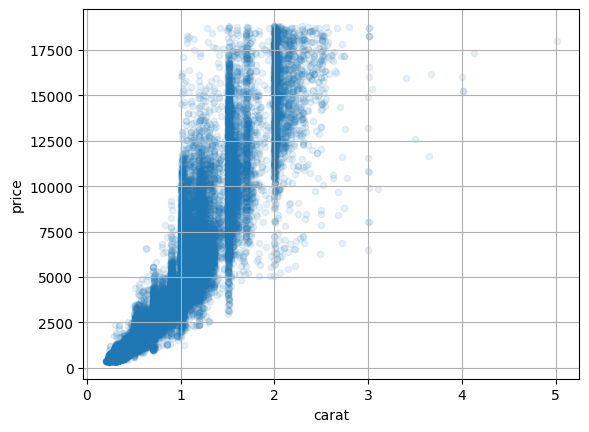

In [9]:
diamonds.plot(kind="scatter", x="carat", y="price",alpha=0.1, grid=True)
plt.show()

In [10]:
diamonds.isna().sum()

Id         0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [11]:
diamonds["cut"].value_counts()

Ideal        17203
Premium      11113
Very Good     9658
Good          3881
Fair          1297
Name: cut, dtype: int64

In [12]:
diamonds["color"].value_counts()

G    9060
E    7832
F    7633
H    6651
D    5421
I    4265
J    2290
Name: color, dtype: int64

In [13]:
diamonds["clarity"].value_counts()

SI1     10428
VS2      9824
SI2      7432
VS1      6475
VVS2     4041
VVS1     2904
IF       1442
I1        606
Name: clarity, dtype: int64

In [14]:
from sklearn.preprocessing import OrdinalEncoder
cut_encoder = OrdinalEncoder(categories=[['Fair', 'Good', 'Very Good', 'Premium', 'Ideal']])
cut_encoded = cut_encoder.fit_transform(diamonds[['cut']])

In [15]:
color_encoder = OrdinalEncoder(categories=[['J','I','H', 'G', 'F', 'E', 'D']])
color_encoded = color_encoder.fit_transform(diamonds[['color']])

In [16]:
clarity_encoder = OrdinalEncoder(categories=[['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF']])
clarity_encoded = clarity_encoder.fit_transform(diamonds[['clarity']])

In [17]:
diamonds["cut"]=cut_encoded
diamonds["color"]=color_encoded
diamonds["clarity"]=clarity_encoded

In [18]:
diamonds.head()

,Id,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,1.06,4.0,1.0,1.0,61.8,57.0,4270,6.57,6.60,4.07
1,2,1.51,3.0,3.0,5.0,60.9,58.0,15164,7.38,7.42,4.51
2,3,0.32,4.0,4.0,3.0,61.3,56.0,828,4.43,4.41,2.71
3,4,0.53,4.0,3.0,3.0,61.2,56.0,1577,5.19,5.22,3.19
4,5,0.70,3.0,2.0,5.0,61.0,57.0,2596,5.76,5.72,3.50


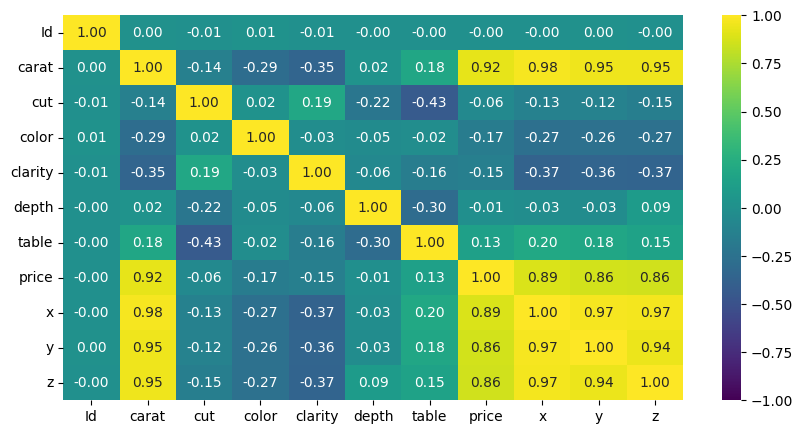

In [19]:
plt.figure(figsize=(10, 5))
heatmap = sns.heatmap(diamonds.corr(), vmin=-1, vmax=1, annot=True, cmap='viridis',fmt='.2f')

array([[<AxesSubplot: xlabel='cut', ylabel='cut'>,
        <AxesSubplot: xlabel='color', ylabel='cut'>,
        <AxesSubplot: xlabel='clarity', ylabel='cut'>,
        <AxesSubplot: xlabel='price', ylabel='cut'>],
       [<AxesSubplot: xlabel='cut', ylabel='color'>,
        <AxesSubplot: xlabel='color', ylabel='color'>,
        <AxesSubplot: xlabel='clarity', ylabel='color'>,
        <AxesSubplot: xlabel='price', ylabel='color'>],
       [<AxesSubplot: xlabel='cut', ylabel='clarity'>,
        <AxesSubplot: xlabel='color', ylabel='clarity'>,
        <AxesSubplot: xlabel='clarity', ylabel='clarity'>,
        <AxesSubplot: xlabel='price', ylabel='clarity'>],
       [<AxesSubplot: xlabel='cut', ylabel='price'>,
        <AxesSubplot: xlabel='color', ylabel='price'>,
        <AxesSubplot: xlabel='clarity', ylabel='price'>,
        <AxesSubplot: xlabel='price', ylabel='price'>]], dtype=object)

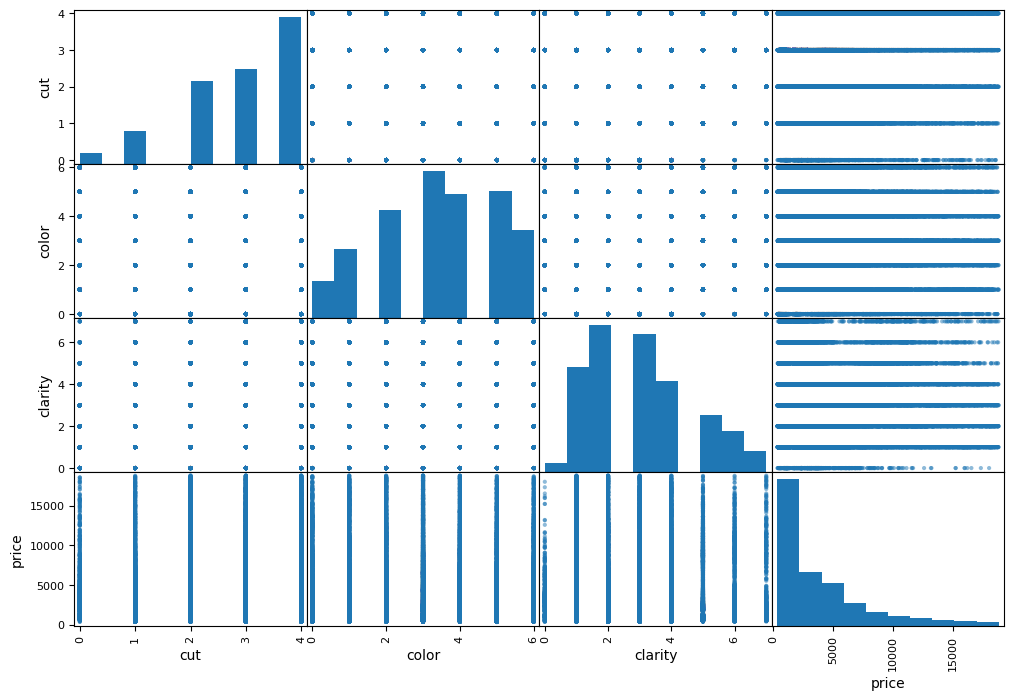

In [20]:
from pandas.plotting import scatter_matrix
attributes = ["cut", "color", "clarity","price"]
scatter_matrix(diamonds[attributes], figsize=(12,8))

## **Preparing Data**

In [21]:
from sklearn.preprocessing import StandardScaler
Diamonds_Tr_num = diamonds.drop("depth", axis=1)
scaler = StandardScaler()
Diamonds_Tr_num_tr = scaler.fit_transform(Diamonds_Tr_num)
Diamonds_Tr_num_tr

array([[-1.73201067,  0.55352944,  0.98206424, ...,  0.74775484,
         0.75294733,  0.75036741],
       [-1.73193039,  1.50372217,  0.08536436, ...,  1.47015258,
         1.46673853,  1.37163489],
       [-1.73185012, -1.0090097 ,  0.98206424, ..., -1.16080215,
        -1.15339745, -1.16991392],
       ...,
       [ 1.73185012, -0.75562498,  0.08536436, ..., -0.69704064,
        -0.752978  , -0.73220273],
       [ 1.73193039, -1.0301251 ,  0.08536436, ..., -1.2053946 ,
        -1.13598791, -1.25463221],
       [ 1.73201067, -0.98789431,  0.98206424, ..., -1.10729121,
        -1.1098736 , -1.12755477]])

In [22]:
Diamonds_Tr_num = diamonds.drop("table", axis=1)
scaler = StandardScaler()
Diamonds_Tr_num_tr = scaler.fit_transform(Diamonds_Tr_num)
Diamonds_Tr_num_tr

array([[-1.73201067,  0.55352944,  0.98206424, ...,  0.74775484,
         0.75294733,  0.75036741],
       [-1.73193039,  1.50372217,  0.08536436, ...,  1.47015258,
         1.46673853,  1.37163489],
       [-1.73185012, -1.0090097 ,  0.98206424, ..., -1.16080215,
        -1.15339745, -1.16991392],
       ...,
       [ 1.73185012, -0.75562498,  0.08536436, ..., -0.69704064,
        -0.752978  , -0.73220273],
       [ 1.73193039, -1.0301251 ,  0.08536436, ..., -1.2053946 ,
        -1.13598791, -1.25463221],
       [ 1.73201067, -0.98789431,  0.98206424, ..., -1.10729121,
        -1.1098736 , -1.12755477]])

In [23]:
labels = train_data["price"].copy()

In [24]:
features =train_data.drop(['price','Id'], axis=1)

In [25]:
features

,carat,cut,color,clarity,depth,table,x,y,z
0,1.06,Ideal,I,SI2,61.8,57.0,6.57,6.60,4.07
1,1.51,Premium,G,VVS2,60.9,58.0,7.38,7.42,4.51
2,0.32,Ideal,F,VS2,61.3,56.0,4.43,4.41,2.71
3,0.53,Ideal,G,VS2,61.2,56.0,5.19,5.22,3.19
4,0.70,Premium,H,VVS2,61.0,57.0,5.76,5.72,3.50
...,...,...,...,...,...,...,...,...,...
43147,0.52,Ideal,E,VS2,61.5,56.0,5.16,5.18,3.18
43148,0.72,Very Good,D,VS2,62.1,59.0,5.70,5.73,3.55
43149,0.44,Premium,I,VVS1,61.5,58.0,4.95,4.87,3.02
43150,0.31,Premium,E,VS1,60.2,58.0,4.38,4.43,2.65


In [26]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler

In [27]:
num_features=features.drop(['color','cut','clarity'],axis=1)
num_features

,carat,depth,table,x,y,z
0,1.06,61.8,57.0,6.57,6.60,4.07
1,1.51,60.9,58.0,7.38,7.42,4.51
2,0.32,61.3,56.0,4.43,4.41,2.71
3,0.53,61.2,56.0,5.19,5.22,3.19
4,0.70,61.0,57.0,5.76,5.72,3.50
...,...,...,...,...,...,...
43147,0.52,61.5,56.0,5.16,5.18,3.18
43148,0.72,62.1,59.0,5.70,5.73,3.55
43149,0.44,61.5,58.0,4.95,4.87,3.02
43150,0.31,60.2,58.0,4.38,4.43,2.65


In [28]:
num_pipeline=Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('std_scaler', StandardScaler()),
            ])

In [29]:
num_pipeline_2 = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('minMax_scaler', MinMaxScaler(feature_range=(0, 1))),
            ])

In [30]:
num_attribs=list(num_features)

In [31]:
cut_pipeline = Pipeline([
     ('cut_imputer',SimpleImputer(strategy="most_frequent")),
    ('cut_encoder', OrdinalEncoder(categories=[['Fair', 'Good', 'Very Good', 'Premium', 'Ideal']]))
])

# Define the pipeline for the 'clarity' feature
clarity_pipeline = Pipeline([
    ('clarity_imputer',SimpleImputer(strategy="most_frequent")),
    ('clarity_encoder', OrdinalEncoder(categories=[['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF']]))
])

# Define the pipeline for the 'color' feature
color_pipeline = Pipeline([
    ('color_imputer',SimpleImputer(strategy="most_frequent")),
    ('color_encoder', OrdinalEncoder(categories=[['J','I','H', 'G', 'F', 'E', 'D']]))
])


In [32]:
full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cut", cut_pipeline, ["cut"]),
    ("clarity", clarity_pipeline, ["clarity"]),
    ("color", color_pipeline, ["color"])
])

In [33]:
full_pipeline_2 = ColumnTransformer([
    ("num", num_pipeline_2, num_attribs),
    ("cut", cut_pipeline, ["cut"]),
    ("clarity", clarity_pipeline, ["clarity"]),
    ("color", color_pipeline, ["color"])
])

In [34]:
full_pipeline_3 = ColumnTransformer([
    ("num", SimpleImputer(strategy="median"), num_attribs),
    ("cut", cut_pipeline, ["cut"]),
    ("clarity", clarity_pipeline, ["clarity"]),
    ("color", color_pipeline, ["color"])
])

In [35]:
prepared_features = full_pipeline.fit_transform(features)

In [36]:
prepared_features_2 = full_pipeline_2.fit_transform(features)

In [37]:
prepared_features_3 = full_pipeline_3.fit_transform(features)

In [38]:
prepered = pd.DataFrame(
    prepared_features,
    columns=full_pipeline.get_feature_names_out(),
    index=train_data.index)
prepered.head(5)

,num__carat,num__depth,num__table,num__x,num__y,num__z,cut__cut,clarity__clarity,color__color
0,0.553529,0.036799,-0.205180,0.747755,0.752947,0.750367,4.0,1.0,1.0
1,1.503722,-0.590188,0.242472,1.470153,1.466739,1.371635,3.0,5.0,3.0
2,-1.009010,-0.311527,-0.652832,-1.160802,-1.153397,-1.169914,4.0,3.0,4.0
3,-0.565586,-0.381192,-0.652832,-0.482997,-0.448311,-0.492168,4.0,3.0,3.0
4,-0.206625,-0.520523,-0.205180,0.025357,-0.013072,-0.054456,3.0,5.0,2.0


In [39]:
prepered2 = pd.DataFrame(
    prepared_features_3,
    columns=full_pipeline.get_feature_names_out(),
    index=train_data.index)
prepered2.head(5)

,num__carat,num__depth,num__table,num__x,num__y,num__z,cut__cut,clarity__clarity,color__color
0,1.06,61.8,57.0,6.57,6.60,4.07,4.0,1.0,1.0
1,1.51,60.9,58.0,7.38,7.42,4.51,3.0,5.0,3.0
2,0.32,61.3,56.0,4.43,4.41,2.71,4.0,3.0,4.0
3,0.53,61.2,56.0,5.19,5.22,3.19,4.0,3.0,3.0
4,0.70,61.0,57.0,5.76,5.72,3.50,3.0,5.0,2.0


## **Models Training**

In [41]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from lightgbm import LGBMRegressor
# import xgboost as xg
from sklearn.neighbors import KNeighborsRegressor

In [42]:
test_features=test_data.drop('Id',axis=1)

In [43]:
test_features_prepared = full_pipeline.transform(test_features)
test_features_prepared_2 = full_pipeline_2.transform(test_features)

In [44]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

### Linear Regresssion

In [45]:
lin_reg=LinearRegression()
lin_reg.fit(prepared_features , labels)

predictions= lin_reg.predict(prepared_features)
lin_mse= mean_squared_error(labels, predictions)
lin_rmse= np.sqrt(lin_mse)
lin_rmse

1210.5169563147958

In [ ]:
scores = cross_val_score(lin_reg, prepared_features , labels, scoring="neg_mean_squared_error", cv=10)
lin_mse_scores=np.sqrt(-scores)
display_scores(lin_mse_scores)

Scores: [1178.58701472 1196.73880963 1241.74835252 1160.17276104 1245.01709869
 1208.99601275 1284.87356398 1190.24156176 1192.9785943  1219.87198445]
Mean: 1211.922575384348
Standard deviation: 34.967441238332455


In [ ]:
lin_prediction_Ts=lin_reg.predict(test_features_prepared)
lin_prediction_Ts

array([ 1088.42423599,  3381.82920653,   400.53217249, ...,
        5173.12682673,  5963.20516725, 14066.93349424])

In [ ]:
submission = test_data[["Id"]]
submission['price']=lin_prediction_Ts
submission.to_csv("lin_submission.csv" ,index = None)

<ipython-input-82-90be3918c038>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  submission['price']=lin_prediction_Ts


In [ ]:
pd.read_csv("lin_submission.csv")

### Decision Tree Regressor

In [ ]:
tree_reg= DecisionTreeRegressor()
tree_reg.fit(prepared_features, labels)

Diamonds_predictions=tree_reg.predict(prepared_features)
tree_mse = mean_squared_error(labels , Diamonds_predictions)
tree_rmse= np.sqrt(tree_mse)
tree_rmse

8.613423979024963

In [ ]:
scores = cross_val_score(tree_reg, prepared_features , labels, scoring="neg_mean_squared_error", cv=10)
tree_mse_scores=np.sqrt(-scores)
display_scores(tree_mse_scores)

Scores: [762.55401756 740.03054743 754.45223136 715.19053138 751.23290347
 691.46177071 744.04678577 743.67150812 702.98329709 747.50896587]
Mean: 735.3132558770643
Standard deviation: 22.47670081013025


In [ ]:
tree_test_predict=tree_reg.predict(test_features_prepared)

array([  676.,  2982.,   737., ...,  4802.,  5174., 13387.])

In [ ]:
submission = test_data[["Id"]]
submission['price']=tree_test_predict
submission.to_csv("tree_submission.csv" ,index = None)

<ipython-input-88-0dad9c5c8c7f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  submission['price']=tree_test_predict


### Random Forest Regressor

In [ ]:
forest_reg = RandomForestRegressor()
forest_reg.fit(prepared_features , labels)

forets_pridictions=forest_reg.predict(prepared_features)
forest_mse = mean_squared_error(labels ,forets_pridictions )
forest_rmse = np.sqrt(forest_mse)
forest_rmse

202.81641625939477

In [ ]:
scores = cross_val_score(forest_reg, prepared_features , labels, scoring="neg_mean_squared_error", cv=10)
forest_mse_scores=np.sqrt(-scores)
display_scores(forest_mse_scores)

Scores: [561.93151136 530.97589665 563.50710549 533.7682549  557.13318509
 549.21431084 548.69030693 531.56330645 517.949414   557.41026142]
Mean: 545.2143553125378
Standard deviation: 14.82040353036729


In [ ]:
forest_test_predict = forest_reg.predict(test_features_prepared)

In [ ]:
submission = test_data[["Id"]]
submission['price']=forest_test_predict
submission.to_csv("rf_submission.csv" ,index = None)

<ipython-input-94-307a4df778de>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  submission['price']=forest_test_predict


### LGBM

In [ ]:
lgbm = LGBMRegressor()
lgbm.fit(prepared_features_2 , labels)

lgbm_pridictions=lgbm.predict(prepared_features_2)
lgbm_mse = mean_squared_error(labels ,lgbm_pridictions )
lgbm_rmse = np.sqrt(lgbm_mse)
lgbm_rmse

471.63846943391815

In [ ]:
scores = cross_val_score(lgbm, prepared_features_2 , labels, scoring="neg_mean_squared_error", cv=10)
lgbm_mse_scores=np.sqrt(-scores)
display_scores(lgbm_mse_scores)

Scores: [571.71477689 515.65417913 556.77770827 511.62791627 531.72304544
 563.54720104 538.88999953 519.9445079  512.87923091 565.24406849]
Mean: 538.8002633871741
Standard deviation: 22.516331064234137


In [ ]:
lgbm_test_predict = lgbm.predict(test_features_prepared)

In [ ]:
submission = test_data[["Id"]]
submission['price']=lgbm_test_predict
submission.to_csv("lgbm_submission.csv" ,index = None)

<ipython-input-86-0d40e3856d62>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  submission['price']=lgbm_test_predict


### XGBoost

In [ ]:
features_copy = features.copy()
cats = features_copy.select_dtypes(exclude=np.number).columns.tolist()

# Convert to Pandas category
for col in cats:
   features_copy[col] = features_copy[col].astype('category')
dtrain_reg = xg.DMatrix(features_copy, labels, enable_categorical=True)
params = {"objective": "reg:squarederror"}

xgb_r = xg.train(
   params=params,
   dtrain=dtrain_reg,
   num_boost_round=100,
)

xgb_pridictions=xgb_r.predict(dtrain_reg)
xgb_mse = mean_squared_error(labels ,xgb_pridictions)
xgb_rmse = np.sqrt(xgb_mse)
xgb_rmse

377.9017287134314

In [ ]:
features_test_copy = test_features.copy()
cats = features_test_copy.select_dtypes(exclude=np.number).columns.tolist()

# Convert to Pandas category
for col in cats:
   features_test_copy[col] = features_test_copy[col].astype('category')
dtest_reg = xg.DMatrix(features_test_copy,None, enable_categorical=True)

xgb_test_pridictions = xgb_r.predict(dtest_reg)
submission = test_data[["Id"]]
submission['price']=xgb_test_pridictions
submission.to_csv("xgb_submission.csv" ,index = None)

<ipython-input-78-d095415cb523>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  submission['price']=xgb_test_pridictions


# Fine tune the model

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid = {
    'learning_rate': [0.01, 0.05,0.5, 0.1],
    'n_estimators': [500, 1000,1200],
    'max_depth': [7,10, 12],
    'num_leaves': [70, 100,120,150]
}

In [ ]:
grid_search = GridSearchCV(lgbm, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(prepared_features_3 , labels)

In [ ]:
grid_search.best_score_ ,grid_search.best_params_

(-286190.5696229956,
 {'learning_rate': 0.01,
  'max_depth': 10,
  'n_estimators': 1000,
  'num_leaves': 100})

In [ ]:
best_lgbm = grid_search.best_estimator_
best_lgbm.fit(prepared_features_3 , labels)

LGBMRegressor(learning_rate=0.01, max_depth=10, n_estimators=1000,
              num_leaves=100)

In [ ]:
scores = cross_val_score(lgbm, prepared_features_3 , labels, scoring="neg_mean_squared_error", cv=10)
lgbm_mse_scores=np.sqrt(-scores)
display_scores(lgbm_mse_scores)

Scores: [571.71477689 515.65417913 556.77770827 511.62791627 531.72304544
 563.54720104 538.88999953 519.9445079  512.87923091 565.24406849]
Mean: 538.8002633871741
Standard deviation: 22.516331064234137


In [ ]:
best_lgbm_test_predict = lgbm.predict(prepared_features_3)

In [ ]:
submission = test_data[["Id"]]
submission['price']=best_lgbm_test_predict
submission.to_csv("minMax_lgbm_submission.csv" ,index = None)

<ipython-input-115-7ce8af0facc1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  submission['price']=best_lgbm_test_predict
